# Analytics and Programming for Health Wearables, ex 2

Milja Lempinen

In [29]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

# 1. Reading signal files

<font color = green> Using the two inspected and filtered signals from last week

In [30]:
data_source_ecg = 'data2/filtered_ecg_data.csv'
data_source_ppg = 'data2/filtered_ppg_data.csv'

In [31]:
df_ecg = pd.read_csv(data_source_ecg, index_col=0)
df_ppg = pd.read_csv(data_source_ppg, index_col=0)

In [32]:
print(df_ecg.head())
print(df_ppg.head())

   ecg_time     ecg_sig
0     0.000  136.128132
1     0.005  256.981026
2     0.010  370.933553
3     0.015  468.601759
4     0.020  541.858765
   ppg_time   ppg_sig
0     0.000 -0.102489
1     0.005 -0.507563
2     0.010 -1.301734
3     0.015 -2.460474
4     0.020 -3.955136


# 1. Peak detection of signals

In [33]:
def peak_detection(signal, min_height):
    peaks = sp.signal.find_peaks(signal, height = min_height)
    return peaks

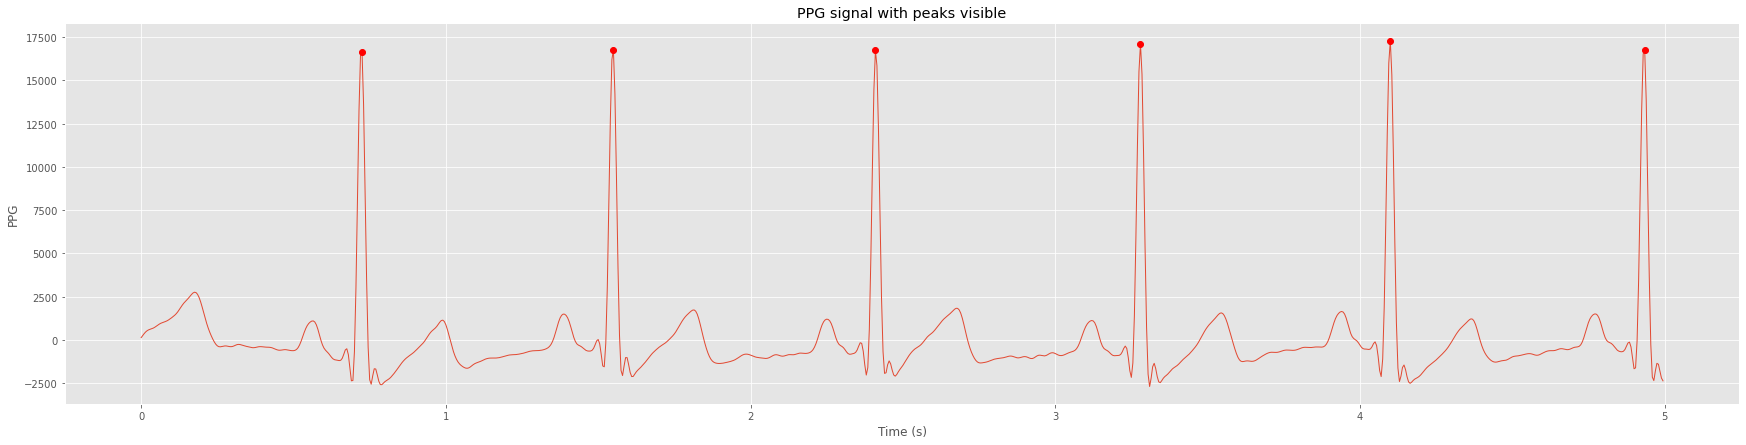

In [34]:
ecg_time = df_ecg['ecg_time'].to_numpy()
ecg_sig = df_ecg['ecg_sig'].to_numpy()

peaks_ecg = peak_detection(ecg_sig, 5000)

first_k_ecg = peak_detection(ecg_sig[0:1000], 5000)

fig = plt.figure(figsize=(30,7))
plt.style.use('ggplot')
plt.plot(ecg_time[0:1000], ecg_sig[0:1000], label="filtered signal", linewidth=1)
plt.title("PPG signal with peaks visible")
plt.xlabel("Time (s)")
plt.ylabel("PPG")
plt.plot(ecg_time[first_k_ecg[0]],ecg_sig[first_k_ecg[0]],"ro")
plt.show()

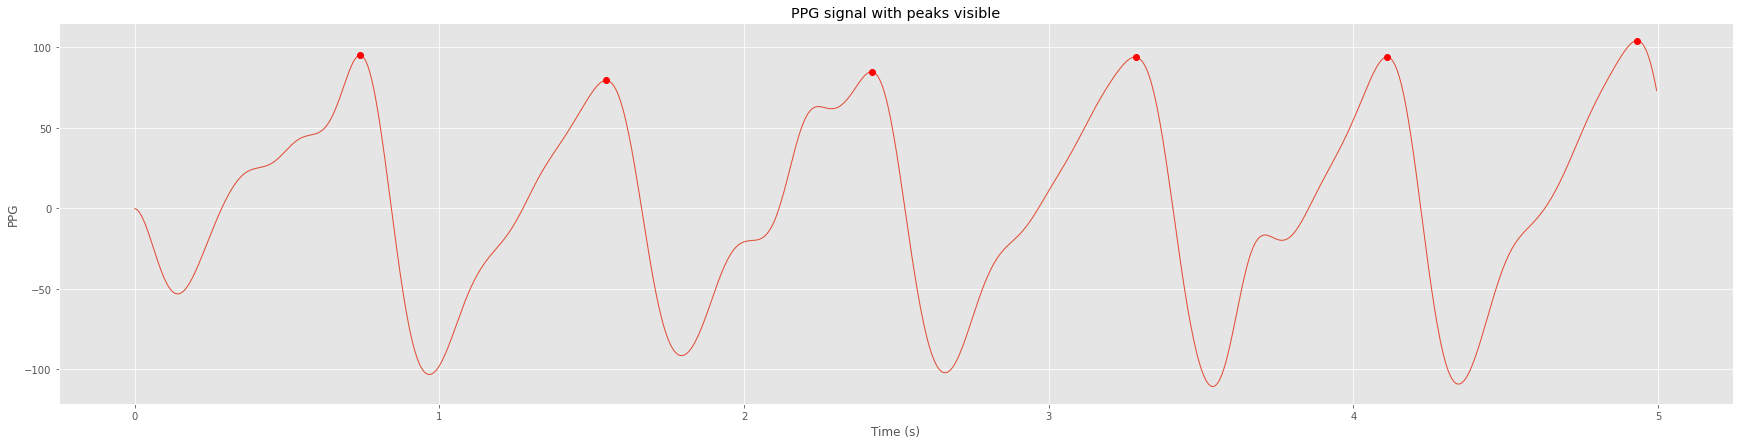

In [35]:
ppg_time = df_ppg['ppg_time'].to_numpy()
ppg_sig = df_ppg['ppg_sig'].to_numpy()

peaks_ppg = peak_detection(ppg_sig, 75)

first_k_ppg = peak_detection(ppg_sig[0:1000], 75)

fig = plt.figure(figsize=(30,7))
plt.plot(ppg_time[0:1000], ppg_sig[0:1000], label="filtered signal", linewidth=1)
plt.title("PPG signal with peaks visible")
plt.xlabel("Time (s)")
plt.ylabel("PPG")
plt.plot(ppg_time[first_k_ppg[0]],ppg_sig[first_k_ppg[0]],"ro")
plt.show()

<font color=green> With this solution we get all peaks. If only R-peak is desired the modifications would be needed. 

# 2. Heart rate

In [36]:
#Computing heart rate without doing any tricks

RR_intervals_ecg = np.diff(ecg_time[peaks_ecg[0]])
RR_intervals_ppg = np.diff(ppg_time[peaks_ppg[0]])

rr_average_ecg = np.mean(RR_intervals_ecg)
rr_average_ppg = np.mean(RR_intervals_ppg)

heart_rate_ppg = 60.0/rr_average_ppg 
print('Heart rate in the ppg signal: '+str(round(heart_rate_ppg, 2))+'bps')

heart_rate_ecg = 60.0/rr_average_ecg 
print('Heart rate in the ecg signal: '+str(round(heart_rate_ecg, 2))+'bps')

Heart rate in the ppg signal: 70.78bps
Heart rate in the ecg signal: 73.3bps


<font color=green>The removal of non-qualifying peaks was already done, but it would be easy: removing intervals that do not fit the heartbeat interval standard from the rr_intervals array and then recalculating.

# 3. HRV

<font color=green> Fixed this to resubmit

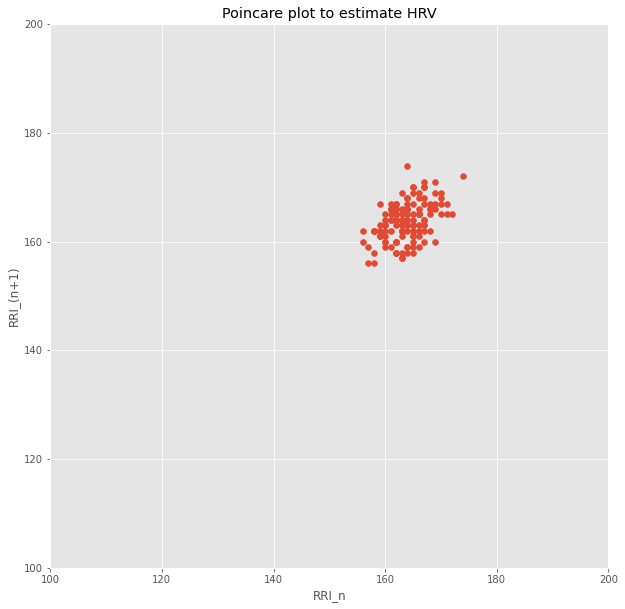

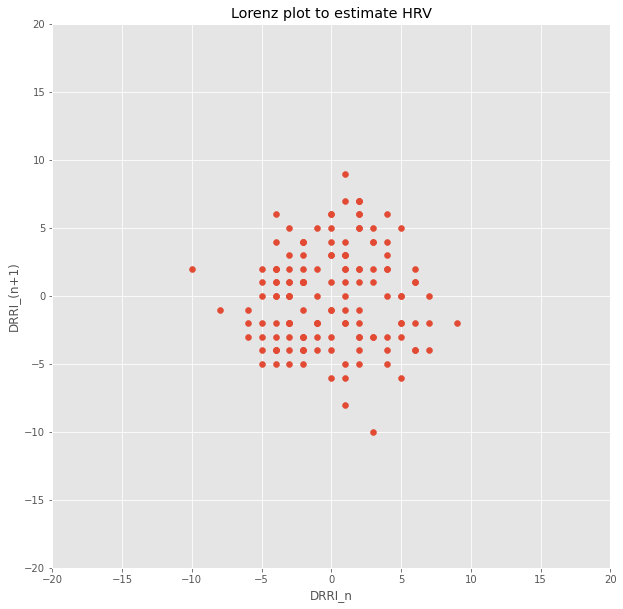

In [37]:
rri = np.diff(peaks_ecg[0])
drri = np.diff(rri)

#Poincare plotting
poincare_x = rri[1:]
poincare_y = rri[:-1]

fig = plt.figure(figsize=(10,10))
plt.xlim([100,200])
plt.ylim([100,200])
plt.title('Poincare plot to estimate HRV')
plt.xlabel('RRI_n')
plt.ylabel('RRI_(n+1)')
plt.scatter(poincare_x, poincare_y)
plt.show()

#Lorenz plotting
lorenz_x = drri[1:]
lorenz_y = drri[:-1]

fig = plt.figure(figsize=(10,10))
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.title('Lorenz plot to estimate HRV')
plt.xlabel('DRRI_n')
plt.ylabel('DRRI_(n+1)')
plt.scatter(lorenz_x, lorenz_y)
plt.show()

# 4. Average time delay

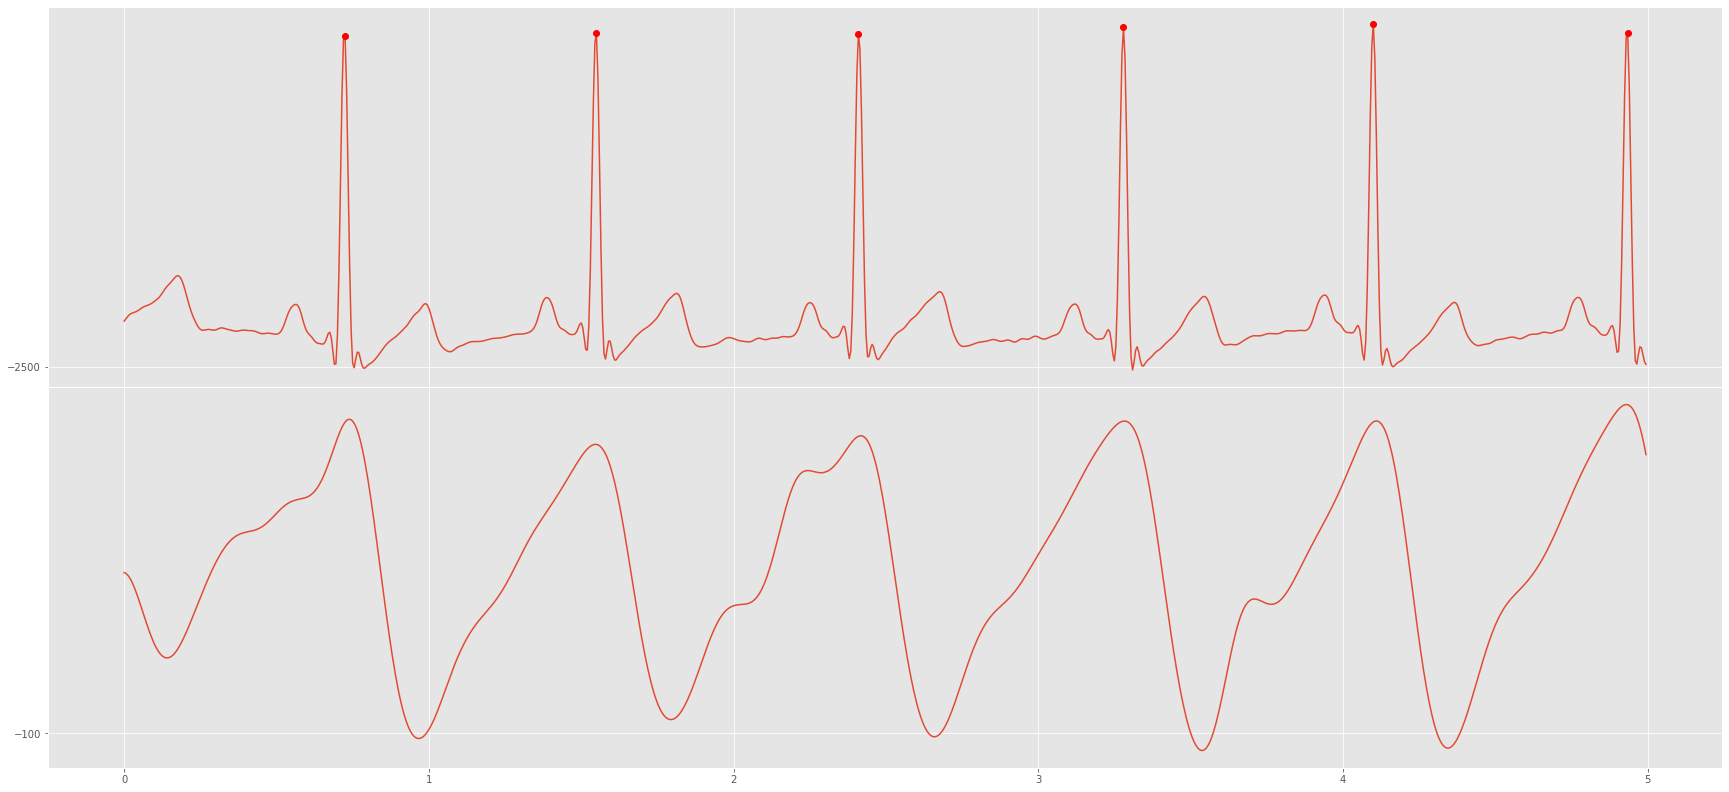

In [38]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(30,14))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(ecg_time[0:1000], ecg_sig[0:1000])
axs[0].plot(ecg_time[first_k_ecg[0]],ecg_sig[first_k_ecg[0]],"ro")
axs[0].set_yticks(np.arange(-2500, 0.0, 17500))

axs[1].plot(ecg_time[0:1000], ppg_sig[0:1000])
axs[1].set_yticks(np.arange(-100, 0.0, 100))

plt.show()


In [39]:
#Estimating that the foot of the ppg is next from low peak, because it is where the direction changes.

def foot_detection(signal):
    peaks = sp.signal.find_peaks(-signal, height = 50)
    feet = peaks[0]+1
    return feet

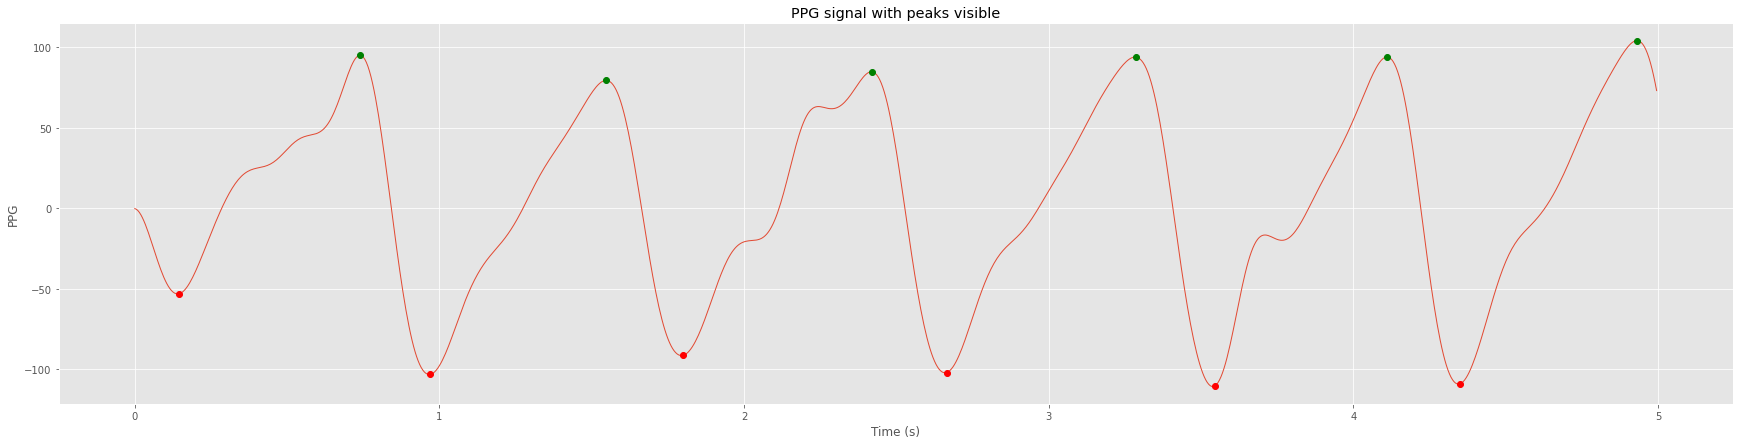

In [40]:
foot_ppg = foot_detection(ppg_sig)

first_k_feet = foot_detection(ppg_sig[0:1000])

fig = plt.figure(figsize=(30,7))
plt.plot(ppg_time[0:1000], ppg_sig[0:1000], label="filtered signal", linewidth=1)
plt.title("PPG signal with peaks visible")
plt.xlabel("Time (s)")
plt.ylabel("PPG")
plt.plot(ppg_time[first_k_feet],ppg_sig[first_k_feet],"ro")
plt.plot(ppg_time[first_k_ppg[0]],ppg_sig[first_k_ppg[0]],"go")
plt.show()

In [41]:
def r_to_foot(feet, r_peaks):
    foot_r_array = []
    x=0
    if feet[0]>r_peaks[0]:
        for i in range(0, (len(feet)+len(r_peaks))):
            foot_r_array.append(r_peaks[x])
            foot_r_array.append(feet[x])
            x=+1
        foot_r_array.append(0)
    else:
        for i in range(0, (len(feet)+len(r_peaks))):
            foot_r_array.append(feet[x])
            foot_r_array.append(r_peaks[x])
            x=+1
        foot_r_array.append(1)
    if foot_r_array[len(foot_r_array)-1]==0:
        foot_r_array = foot_r_array[1::2]
    else:
        foot_r_array = foot_r_array[0::2]
    return foot_r_array
        

In [42]:
feet = r_to_foot(foot_ppg, peaks_ppg[0])
print(feet[len(feet)-1])

foot_to_r_intervals = np.diff(ppg_time[feet[0:(len(feet)-1)]])

mean_ftr = np.mean(foot_to_r_intervals)
print(mean_ftr)

1
0.0028061224489795917


In [43]:
#Fixed maybe the issue, seems more like it now